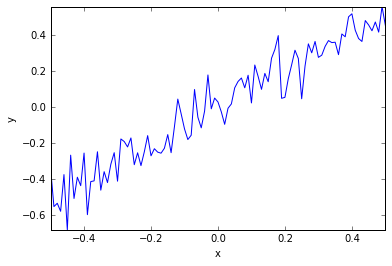

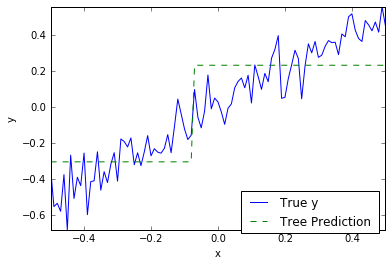

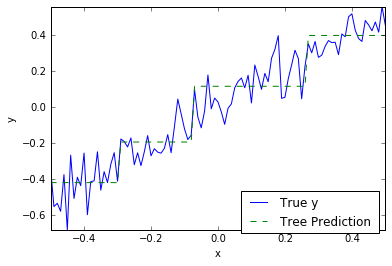

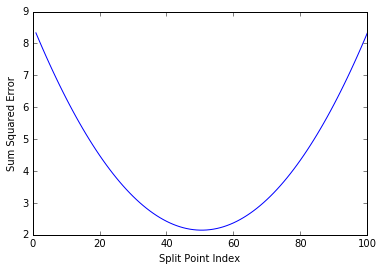

-0.010000000000000009


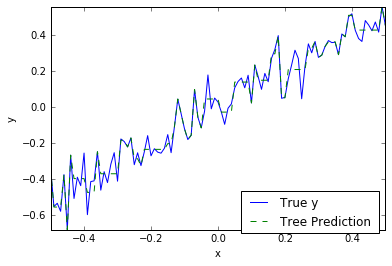

In [2]:
import numpy
import matplotlib.pyplot as plot
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO

#Build a simple data set with y = x + random
nPoints = 100

#x values for plotting
xPlot = [(float(i)/float(nPoints) - 0.5) for i in range(nPoints + 1)]

#x needs to be list of lists.
x = [[s] for s in xPlot]

#y (labels) has random noise added to x-value
#set seed
numpy.random.seed(1)
y = [s + numpy.random.normal(scale=0.1) for s in xPlot]

plot.plot(xPlot,y)
plot.axis('tight')
plot.xlabel('x')
plot.ylabel('y')
plot.show()

simpleTree = DecisionTreeRegressor(max_depth=1)
simpleTree.fit(x, y)

#draw the tree
with open("simpleTree.dot", 'w') as f:
    f = tree.export_graphviz(simpleTree, out_file=f)

#compare prediction from tree with true values

yHat  = simpleTree.predict(x)

plot.figure()
plot.plot(xPlot, y, label='True y')
plot.plot(xPlot, yHat, label='Tree Prediction ', linestyle='--')
plot.legend(bbox_to_anchor=(1,0.2))
plot.axis('tight')
plot.xlabel('x')
plot.ylabel('y')
plot.show()

simpleTree2 = DecisionTreeRegressor(max_depth=2)
simpleTree2.fit(x, y)

#draw the tree
with open("simpleTree2.dot", 'w') as f:
    f = tree.export_graphviz(simpleTree2, out_file=f)

#compare prediction from tree with true values

yHat  = simpleTree2.predict(x)

plot.figure()
plot.plot(xPlot, y, label='True y')
plot.plot(xPlot, yHat, label='Tree Prediction ', linestyle='--')
plot.legend(bbox_to_anchor=(1,0.2))
plot.axis('tight')
plot.xlabel('x')
plot.ylabel('y')
plot.show()

#split point calculations - try every possible split point to find the best one
sse = []
xMin = []
for i in range(1, len(xPlot)):
    #divide list into points on left and right of split point
    lhList = list(xPlot[0:i])
    rhList = list(xPlot[i:len(xPlot)])

    #calculate averages on each side
    lhAvg = sum(lhList) / len(lhList)
    rhAvg = sum(rhList) / len(rhList)

    #calculate sum square error on left, right and total
    lhSse = sum([(s - lhAvg) * (s - lhAvg) for s in lhList])
    rhSse = sum([(s - rhAvg) * (s - rhAvg) for s in rhList])

    #add sum of left and right to list of errors

    sse.append(lhSse + rhSse)
    xMin.append(max(lhList))

plot.plot(range(1, len(xPlot)), sse)
plot.xlabel('Split Point Index')
plot.ylabel('Sum Squared Error')
plot.show()

minSse = min(sse)
idxMin = sse.index(minSse)
print(xMin[idxMin])

#what happens if the depth is really high?
simpleTree6 = DecisionTreeRegressor(max_depth=6)
simpleTree6.fit(x, y)

#too many nodes to draw the tree
#with open("simpleTree2.dot", 'w') as f:
#    f = tree.export_graphviz(simpleTree6, out_file=f)

#compare prediction from tree with true values

yHat  = simpleTree6.predict(x)

plot.figure()
plot.plot(xPlot, y, label='True y')
plot.plot(xPlot, yHat, label='Tree Prediction ', linestyle='--')
plot.legend(bbox_to_anchor=(1,0.2))
plot.axis('tight')
plot.xlabel('x')
plot.ylabel('y')
plot.show()



# Cross Validation at a Range of Tree Depths

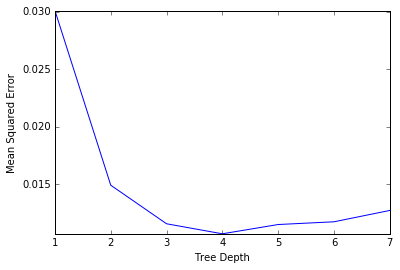

In [5]:
import numpy
import matplotlib.pyplot as plot
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO

#Build a simple data set with y = x + random
nPoints = 1000

#x values for plotting
xPlot = [(float(i)/float(nPoints) - 0.5) for i in range(nPoints + 1)]

#x needs to be list of lists.
x = [[s] for s in xPlot]

#y (labels) has random noise added to x-value
#set seed
numpy.random.seed(1)
y = [s + numpy.random.normal(scale=0.1) for s in xPlot]

nrow = len(x)

#fit trees with several different values for depth and use x-validation to see which works best.

depthList = [1, 2, 3, 4, 5, 6, 7]
xvalMSE = []
nxval = 10

for iDepth in depthList:

    #build cross-validation loop to fit tree and evaluate on out of sample data
    for ixval in range(nxval):

        #Define test and training index sets
        idxTest = [a for a in range(nrow) if a%nxval == ixval%nxval]
        idxTrain = [a for a in range(nrow) if a%nxval != ixval%nxval]

        #Define test and training attribute and label sets
        xTrain = [x[r] for r in idxTrain]
        xTest = [x[r] for r in idxTest]
        yTrain = [y[r] for r in idxTrain]
        yTest = [y[r] for r in idxTest]

        #train tree of appropriate depth and accumulate out of sample (oos) errors
        treeModel = DecisionTreeRegressor(max_depth=iDepth)
        treeModel.fit(xTrain, yTrain)

        treePrediction = treeModel.predict(xTest)
        error = [yTest[r] - treePrediction[r] for r in range(len(yTest))]

        #accumulate squared errors
        if ixval == 0:
            oosErrors = sum([e * e for e in error])
        else:
            #accumulate predictions
            oosErrors += sum([e * e for e in error])

    #average the squared errors and accumulate by tree depth

    mse = oosErrors/nrow
    xvalMSE.append(mse)

plot.plot(depthList, xvalMSE)
plot.axis('tight')
plot.xlabel('Tree Depth')
plot.ylabel('Mean Squared Error')
plot.show()

# Simple Bagging

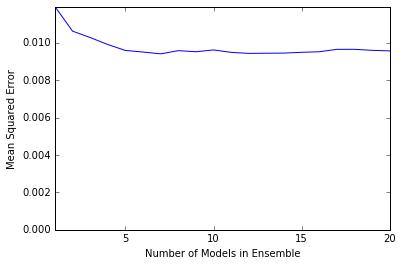

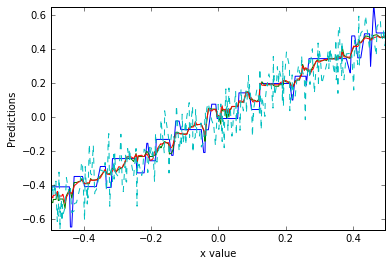

Minimum MSE
0.00940847463673


In [9]:
import numpy
import matplotlib.pyplot as plot
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from math import floor
import random


#Build a simple data set with y = x + random
nPoints = 1000

#x values for plotting
xPlot = [(float(i)/float(nPoints) - 0.5) for i in range(nPoints + 1)]

#x needs to be list of lists.
x = [[s] for s in xPlot]

#y (labels) has random noise added to x-value
#set seed
random.seed(1)
y = [s + numpy.random.normal(scale=0.1) for s in xPlot]

#take fixed test set 30% of sample
nSample = int(nPoints * 0.30)
idxTest = random.sample(range(nPoints), nSample)
idxTest.sort()
idxTrain = [idx for idx in range(nPoints) if not(idx in idxTest)]

#Define test and training attribute and label sets
xTrain = [x[r] for r in idxTrain]
xTest = [x[r] for r in idxTest]
yTrain = [y[r] for r in idxTrain]
yTest = [y[r] for r in idxTest]

#train a series of models on random subsets of the training data
#collect the models in a list and check error of composite as list grows

#maximum number of models to generate
numTreesMax = 20

#tree depth - typically at the high end
treeDepth = 5

#initialize a list to hold models
modelList = []
predList = []

#number of samples to draw for stochastic bagging
nBagSamples = int(len(xTrain) * 0.5)

for iTrees in range(numTreesMax):
    idxBag = []
    for i in range(nBagSamples):
        idxBag.append(random.choice(range(len(xTrain))))
    xTrainBag = [xTrain[i] for i in idxBag]
    yTrainBag = [yTrain[i] for i in idxBag]

    modelList.append(DecisionTreeRegressor(max_depth=treeDepth))
    modelList[-1].fit(xTrainBag, yTrainBag)

    #make prediction with latest model and add to list of predictions
    latestPrediction = modelList[-1].predict(xTest)
    predList.append(list(latestPrediction))


#build cumulative prediction from first "n" models
mse = []
allPredictions = []
for iModels in range(len(modelList)):

    #average first "iModels" of the predictions
    prediction = []
    for iPred in range(len(xTest)):
        prediction.append(sum([predList[i][iPred] for i in range(iModels + 1)])/(iModels + 1))

    allPredictions.append(prediction)
    errors = [(yTest[i] - prediction[i]) for i in range(len(yTest))]
    mse.append(sum([e * e for e in errors]) / len(yTest))


nModels = [i + 1 for i in range(len(modelList))]

plot.plot(nModels,mse)
plot.axis('tight')
plot.xlabel('Number of Models in Ensemble')
plot.ylabel('Mean Squared Error')
plot.ylim((0.0, max(mse)))
plot.show()

plotList = [0, 9, 19]
for iPlot in plotList:
    plot.plot(xTest, allPredictions[iPlot])
plot.plot(xTest, yTest, linestyle="--")
plot.axis('tight')
plot.xlabel('x value')
plot.ylabel('Predictions')
plot.show()

print('Minimum MSE')
print(min(mse))


#With treeDepth = 1
#Minimum MSE
#0.0242960117899



#With treeDepth = 5
#Minimum MSE
#0.0118893503384